In [ ]:
# from https://ericmjl.github.io/bayesian-stats-talk/

In [6]:
# Imports
import pymc3 as pm
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import seaborn as sns

# Set plotting style
# plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('poster')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [7]:
from random import shuffle

In [8]:
total = 30
n_heads = 11
n_tails = total - n_heads
tosses = [1] * n_heads + [0] * n_tails
shuffle(tosses)

In [9]:
print(tosses)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]


In [10]:
def plot_coins():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.bar(list(Counter(tosses).keys()), list(Counter(tosses).values()))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['tails', 'heads'])
    ax.set_ylim(0, 20)
    ax.set_yticks(np.arange(0, 21, 5))
    return fig

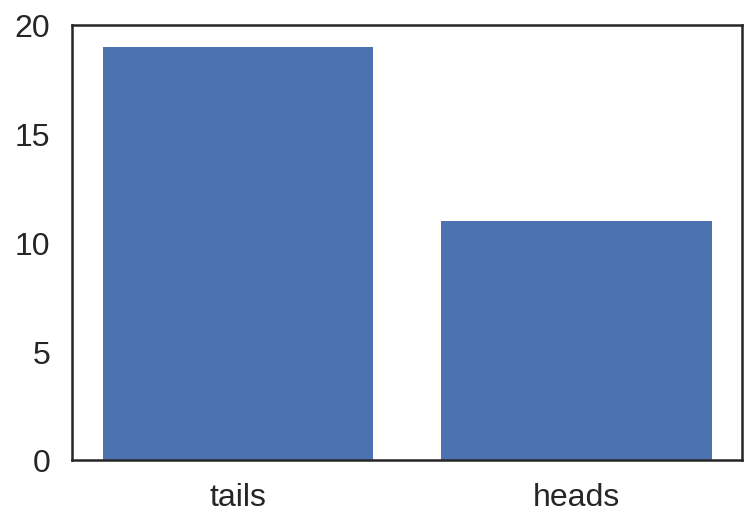

In [11]:
fig = plot_coins()
plt.show()    

In [12]:
# Context manager syntax. `coin_model` is **just** a placeholder
with pm.Model() as coin_model: 
    # Distributions are PyMC3 objects.
    # Specify prior using Uniform object.
    p_prior = pm.Uniform('p', 0, 1)  
    
    # Specify likelihood using Bernoulli object.
    like = pm.Bernoulli('likelihood', p=p_prior, observed=tosses)  # "observed=data" is key for likelihood.

In [13]:
with coin_model:
    # don't worry about this:
    step = pm.Metropolis()
    
    # focus on this, the Inference Button:
    coin_trace = pm.sample(2000, step=step)

100%|██████████| 2000/2000 [00:00<00:00, 3196.06it/s]


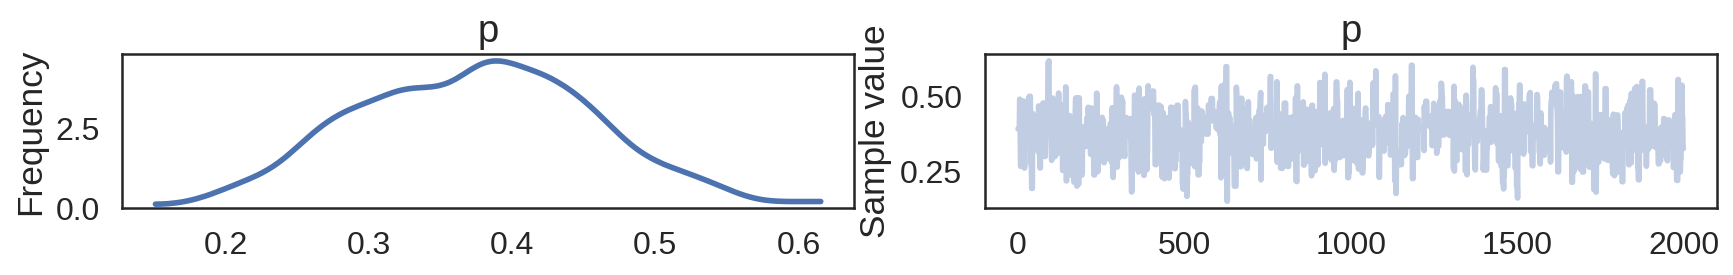

In [14]:
pm.traceplot(coin_trace)
plt.show()

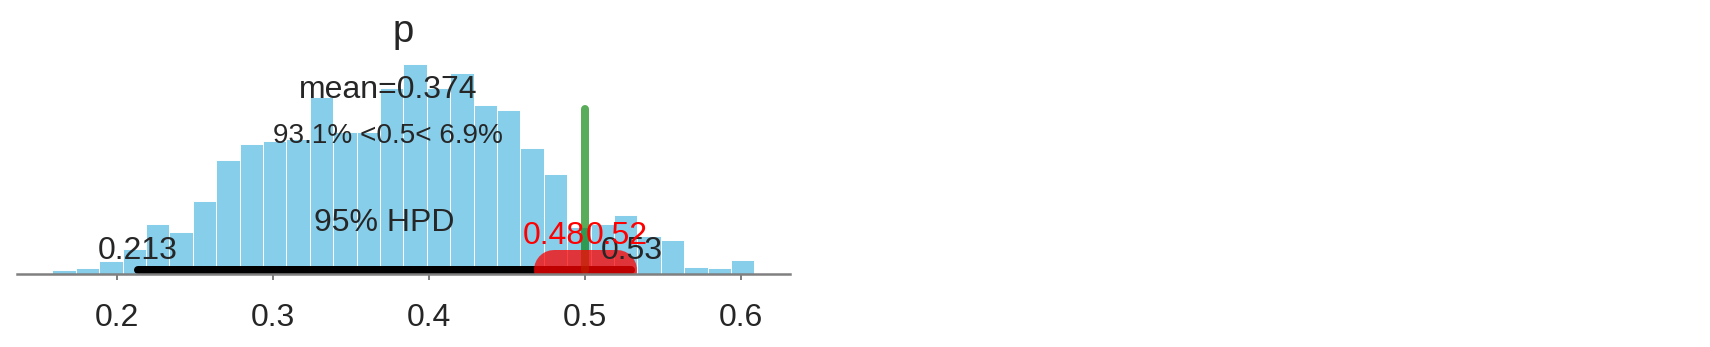

In [15]:
pm.plot_posterior(coin_trace[100:], color='#87ceeb', 
                  rope=[0.48, 0.52], point_estimate='mean', 
                  ref_val=0.5)
plt.show()

In [16]:
# 95% highest posterior density (HPD) encompasses the region of practical equivalence (ROPE)

1. parameterize your problem using statistical distributions
2. justify your model structure
3. write model in PyMC3, hit the Inference ButtonTM
4. interpret based on posterior distributions
5. (optional) with new information, modify model structure.